In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import rcParams

# Data Analysis w/ Pandas & MEPS Data

In this notebook, we will pick up where we left off with the MEPS data extraction notebook.  Now that we have generated the data in a more usable format, we can begin to explore the data to understand trends and ask questions (like "Is self-reported health correlated with observed health spending?").

#### What you will accomplish
Validate the datasets you created, generate descriptive statistics, and visualize trends in the data.

## Validating the Data

Before you begin analyzing your data for insights, you should confirm your data conforms to your general expectations about the data.  Using the 2015 data, try to establish expectations for the following questions (the MEPS documentation should be helpful for this), and then use Pandas to find the values observed in the dataset:

* How many unique IDs do we have? How many total? Do we have any negative IDs?
    * Expected: 35,427 unique & total IDS
* Do we have any missing values (e.g. a person where sex field is not populated)
* What percent of the population is male?
    * Expected: 48.02%
* What is the average spending? How many people or insurance providers have negative expenses?
* Are there any negative age values?
* What is the race distribution?
    Expected: 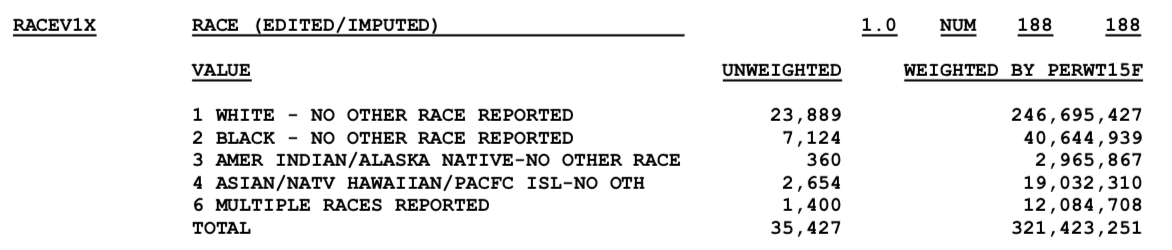
* What is the income level distribution
    Expected: 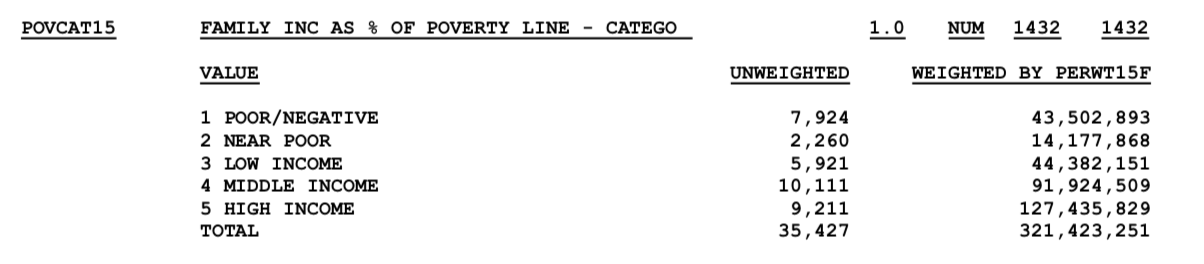
* What is the age distribution?
    Expected: 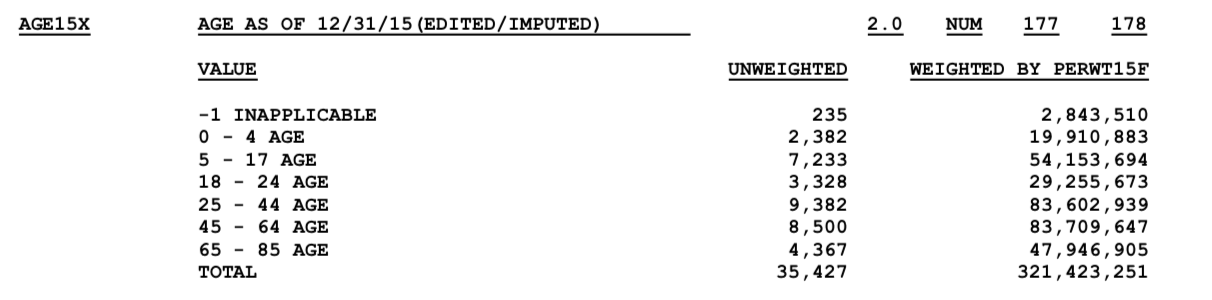
* What percent of the data self-reports "yes" to each chronic diagnosis, and do these proportions match up with the expected proportions from the codebook?
    * Expected:
        * Cancer: 6.34%
        * Asthma: 9.81%
        * Diabetes: 7.93%
* What percent of people are from each region?
    * Expected:
        * Northeast: 14.82%
        * Midwest: 18.48%
        * South: 38.13%
        * West: 27.90%

In addition, come up with a few additional questions of your own.

If any of your expectations aren't met, you may need to consult other sources (e.g. the codebook or internet) to determine whether your expectations should be updated or whether there is a problem in your data.

In [4]:
# Import 2015 csv as df
df = pd.read_csv("mepsdata2015.csv")
df.head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,rh42_53_chnge,rh53,rh_tot_chnge,sex,tot_exp,tot_mcd_exp,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id
0,772,53,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,0.0,Fair,0.0,male,46612,5917,40320,0,375,60001101
1,362,56,No,No,Yes,Yes,No,Yes,Yes,Yes,...,0.0,Fair,0.0,female,9207,6231,2959,0,11,60001102
2,0,30,No,No,No,No,No,No,No,No,...,0.0,Excellent,0.0,male,0,0,0,0,0,60001103
3,381,23,No,No,No,No,No,No,No,No,...,0.0,Excellent,0.0,female,808,786,0,0,22,60001104
4,0,3,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,Inapplicable,Inapplicable,Inapplicable,...,0.0,Excellent,0.0,male,2721,2379,0,0,77,60001105


### Validating Unique IDs and Checking for Missing Data

##### How many unique IDs do we have? How many total? Do we have any negative IDs? Do we have any missing values?

In [5]:
# Expected: 35,427 unique & total IDS
# Note - it is OK that there are missing values in the mh/rh change categories, since
# if users refused to answer or it was inapplicable, then the value should be N/A
df.describe()

,ER_exp,age,fam_inc_tot,inc_contin,inp_exp,mh31_42_chnge,mh42_53_chnge,mh_tot_chnge,outp_exp,rh31_42_chnge,rh42_53_chnge,rh_tot_chnge,tot_exp,tot_mcd_exp,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id
count,35427.000000,35427.000000,35427.000000,35427.000000,35427.000000,34151.000000,34548.000000,33976.000000,35427.000000,34167.000000,34562.000000,33998.000000,35427.000000,35427.000000,35427.000000,35427.000000,35427.000000,3.542700e+04
mean,164.249217,35.850905,61684.233014,308.495398,1039.900189,0.072970,0.003473,0.075995,275.737996,0.038868,-0.011921,0.025619,4171.132639,713.827702,1189.664606,1389.853078,449.816835,7.037777e+07
std,1163.160987,22.693505,58634.332666,297.844810,8917.259320,0.912194,0.899751,0.935724,2358.456694,0.914388,0.889924,0.933357,14037.579996,5296.987014,7279.611930,8109.777365,1554.355596,5.956064e+06
min,0.000000,0.000000,-134723.000000,-824.650000,0.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000110e+07
25%,0.000000,16.000000,21000.000000,110.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000,0.000000,0.000000,6.516310e+07
50%,0.000000,34.000000,45000.000000,222.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,620.000000,0.000000,0.000000,0.000000,41.000000,7.064110e+07
75%,0.000000,54.000000,84000.000000,409.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2850.000000,57.000000,0.000000,493.000000,346.500000,7.557910e+07
max,102011.000000,85.000000,521685.000000,3051.380000,656333.000000,4.000000,4.000000,4.000000,134736.000000,4.000000,4.000000,4.000000,700771.000000,534580.000000,421571.000000,653289.000000,84747.000000,8.057110e+07


In [6]:
# There are 35,427 total entries and 35,427 unique user IDs - this is what we expected
print len(df)
df.user_id.nunique()

35427


35427

In [7]:
# Check for null values in remaining categories
# This is good - only categories which we would expect to have null values actually do
df.isnull().sum()

ER_exp              0
age                 0
dx_COPD             0
dx_IHD              0
dx_arth             0
dx_asth             0
dx_canc             0
dx_diab             0
dx_hyplp            0
dx_hyptn            0
dx_strk             0
fam_inc_tot         0
inc_categ           0
inc_contin          0
inp_exp             0
insur_mcd           0
insur_mcr           0
insur_priv          0
mh31                0
mh31_42_chnge    1276
mh42                0
mh42_53_chnge     879
mh53                0
mh_tot_chnge     1451
outp_exp            0
race                0
region              0
rh31                0
rh31_42_chnge    1260
rh42                0
rh42_53_chnge     865
rh53                0
rh_tot_chnge     1429
sex                 0
tot_exp             0
tot_mcd_exp         0
tot_mcr_exp         0
tot_prv_exp         0
tot_slf_exp         0
user_id             0
dtype: int64

### Validate For Allowed Value Ranges

##### Does the range of each variable's value match to what it should be in the codebook?

In [8]:
# Validate for minimum and non-neg values
# This checks out!
#df.apply([np.nanmin,np.nanmax])
df.min(numeric_only=True)

ER_exp                  0.00
age                     0.00
fam_inc_tot       -134723.00
inc_contin           -824.65
inp_exp                 0.00
mh31_42_chnge          -4.00
mh42_53_chnge          -4.00
mh_tot_chnge           -4.00
outp_exp                0.00
rh31_42_chnge          -4.00
rh42_53_chnge          -4.00
rh_tot_chnge           -4.00
tot_exp                 0.00
tot_mcd_exp             0.00
tot_mcr_exp             0.00
tot_prv_exp             0.00
tot_slf_exp             0.00
user_id          60001101.00
dtype: float64

In [9]:
# Validate for maximum values
# This checks out!
df.max(numeric_only=True)

ER_exp             102011.00
age                    85.00
fam_inc_tot        521685.00
inc_contin           3051.38
inp_exp            656333.00
mh31_42_chnge           4.00
mh42_53_chnge           4.00
mh_tot_chnge            4.00
outp_exp           134736.00
rh31_42_chnge           4.00
rh42_53_chnge           4.00
rh_tot_chnge            4.00
tot_exp            700771.00
tot_mcd_exp        534580.00
tot_mcr_exp        421571.00
tot_prv_exp        653289.00
tot_slf_exp         84747.00
user_id          80571103.00
dtype: float64

## Validate Value Counts for Categorical Variables

##### What are the distributions of the categorical variables? Do they match what we expected to see from the codebook?

### Convert 'object' type variables to categorical variables

In [10]:
# What does this do with the inapplicable values???
df['region'] = pd.Categorical(df.region.tolist(), categories=['Northeast','Midwest', 'South','West'],
                       ordered=True)
df.region.cat.codes.mean()

1.7777965958167499

In [11]:
reg_c = pd.Categorical(df.region.tolist(), categories=['Northeast','Midwest', 'South','West'],
                       ordered=True)
print reg_c
reg_c.codes.mean()

[Midwest, Midwest, Midwest, Midwest, Midwest, ..., South, Midwest, South, South, South]
Length: 35427
Categories (4, object): [Northeast < Midwest < South < West]


1.7777965958167499

In [12]:
# Convert all self-health ratings to categorical types & find means
health_rating_categs = ['rh31', 'rh42', 'rh53', 'mh31', 'mh42', 'mh53']
for rating in health_rating_categs:
    df["{0}".format(rating)] = pd.Categorical(df["{0}".format(rating)].tolist(), 
                                   categories=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
                                   ordered=True)
    print "{0} mean".format(rating)
    print df["{0}".format(rating)].cat.codes.mean()

rh31 mean
1.1217433031303807
rh42 mean
1.1798345894374347
rh53 mean
1.1765884777147373
mh31 mean
0.8654133852711209
mh42 mean
0.9563891946820222
mh53 mean
0.9674542015976515


In [13]:
# Convert all diagnosis variables to categorical types & find means
chron_dx_categs = ['dx_arth', 'dx_asth', 'dx_canc', 'dx_COPD', 'dx_diab', 'dx_hyplp', 'dx_hyptn', 'dx_IHD', 'dx_strk']
for condition in chron_dx_categs:
    df["{0}".format(condition)] = pd.Categorical(df["{0}".format(condition)].tolist(), 
                                     categories=['Yes', 'No'], ordered=True)
    print "{0} mean".format(condition)
    print df["{0}".format(condition)].cat.codes.mean()

dx_arth mean
0.2734072882264939
dx_asth mean
0.8956727919383521
dx_canc mean
0.39006972083439184
dx_COPD mean
0.440483247240805
dx_diab mean
0.37434724927315327
dx_hyplp mean
0.24074858159031248
dx_hyptn mean
0.2132554266519886
dx_IHD mean
0.4168289722528015
dx_strk mean
0.4242244615688599


In [14]:
# Change sex to a categorical variable and find mean
df['sex'] = pd.Categorical(df.sex.tolist(), categories=['male', 'female'], ordered=True)
df.sex.cat.codes.mean()

0.5197730544499958

In [15]:
# Change race to a categorical variable and find mean
df['race'] = pd.Categorical(df.race.tolist(), 
                            categories=['White', 'Black', 'American Indian/Alaska Native',
                                       'Asian/Native Hawaiian/Pacific Islander',
                                       'Multiple Races Reported'], ordered=True)
df.race.cat.codes.mean()

0.604228413357044

In [16]:
# Change insurance status to categorical variable and find mean
insur_categs = ['insur_mcd','insur_mcr', 'insur_priv']
for insurance_type in insur_categs:
    df["{0}".format(insurance_type)] = pd.Categorical(df["{0}".format(insurance_type)].tolist(), 
                                                       categories=['Yes', 'No'], ordered=True)
    print "{0} mean".format(insurance_type)
    print df["{0}".format(insurance_type)].cat.codes.mean()
    

insur_mcd mean
0.672396759533689
insur_mcr mean
0.8494368701837581
insur_priv mean
0.4849973184294465


In [17]:
# Ensure that all relevant variables have been converted to categorical types
# This checks out! (it is ok for inc_categ to be an object because we have inc_contin)
df.dtypes

ER_exp              int64
age                 int64
dx_COPD          category
dx_IHD           category
dx_arth          category
dx_asth          category
dx_canc          category
dx_diab          category
dx_hyplp         category
dx_hyptn         category
dx_strk          category
fam_inc_tot         int64
inc_categ          object
inc_contin        float64
inp_exp             int64
insur_mcd        category
insur_mcr        category
insur_priv       category
mh31             category
mh31_42_chnge     float64
mh42             category
mh42_53_chnge     float64
mh53             category
mh_tot_chnge      float64
outp_exp            int64
race             category
region           category
rh31             category
rh31_42_chnge     float64
rh42             category
rh42_53_chnge     float64
rh53             category
rh_tot_chnge      float64
sex              category
tot_exp             int64
tot_mcd_exp         int64
tot_mcr_exp         int64
tot_prv_exp         int64
tot_slf_exp 

### Value count validation for categorical variables

In [18]:
# Validate for chronic conditions
# These all check out!
for condition in chron_dx_categs:
    print ("{0} value counts".format(condition))
    print df['{0}'.format(condition)].value_counts().sort_index()

dx_arth value counts
Yes     6365
No     19374
Name: dx_arth, dtype: int64
dx_asth value counts
Yes     3476
No     31841
Name: dx_asth, dtype: int64
dx_canc value counts
Yes     2246
No     23500
Name: dx_canc, dtype: int64
dx_COPD value counts
Yes      470
No     25281
Name: dx_COPD, dtype: int64
dx_diab value counts
Yes     2809
No     22940
Name: dx_diab, dtype: int64
dx_hyplp value counts
Yes     7480
No     18238
Name: dx_hyplp, dtype: int64
dx_hyptn value counts
Yes     8476
No     17253
Name: dx_hyptn, dtype: int64
dx_IHD value counts
Yes     1290
No     24452
Name: dx_IHD, dtype: int64
dx_strk value counts
Yes     1050
No     24703
Name: dx_strk, dtype: int64


In [19]:
# Validate regional value counts
df.region.value_counts(normalize=True)

South        0.383809
West         0.280888
Midwest      0.186065
Northeast    0.149238
Name: region, dtype: float64

In [20]:
# Validate self-assessed health value counts
for category in health_rating_categs:
    print ("{0} value counts".format(category))
    print df['{0}'.format(category)].value_counts().sort_index()

rh31 value counts
Excellent    11633
Very Good     9851
Good          8449
Fair          3375
Poor           997
Name: rh31, dtype: int64
rh42 value counts
Excellent    10962
Very Good    10218
Good          9386
Fair          3331
Poor           869
Name: rh42, dtype: int64
rh53 value counts
Excellent    11332
Very Good    10191
Good          9378
Fair          3268
Poor           838
Name: rh53, dtype: int64
mh31 value counts
Excellent    15453
Very Good     8718
Good          7753
Fair          1887
Poor           478
Name: mh31, dtype: int64
mh42 value counts
Excellent    14337
Very Good     9362
Good          8494
Fair          2059
Poor           506
Name: mh42, dtype: int64
mh53 value counts
Excellent    14492
Very Good     9288
Good          8723
Fair          2016
Poor           480
Name: mh53, dtype: int64


In [21]:
df.tot_exp.describe()

count     35427.000000
mean       4171.132639
std       14037.579996
min           0.000000
25%          92.000000
50%         620.000000
75%        2850.000000
max      700771.000000
Name: tot_exp, dtype: float64

In [22]:
# Validate spending value counts (Total expenditures)
# This is not exactly the counts that were expected..is this ok?
tot_exp_cats = pd.cut(df['tot_exp'], bins=[0,.99,331,1098,4032,700771], 
                    labels=['$0','$1-$331','$332-$1098','$1099-$4032','$4033-$700771'],
                     right=True, include_lowest=True)
df['tot_exp_cats'] = tot_exp_cats
df.tot_exp_cats.value_counts().sort_index()

$0               6936
$1-$331          7133
$332-$1098       7114
$1099-$4032      7122
$4033-$700771    7122
Name: tot_exp_cats, dtype: int64

In [23]:
# Validate spending value counts (Personal expenditures)
# Again, slightly different than expected (in lower range)
tot_slf_cats = pd.cut(df['tot_slf_exp'], bins=[0,.99,63,227,692,84747], 
                    labels=['$0','$1-$63','$63-$227','$228-$692','$6933-$84747'],
                     right=True, include_lowest=True)
df['tot_slf_cats'] = tot_slf_cats
df.tot_slf_cats.value_counts().sort_index()

$0              13409
$1-$63           5518
$63-$227         5496
$228-$692        5502
$6933-$84747     5502
Name: tot_slf_cats, dtype: int64

In [24]:
# Validate spending value counts (Medicare expenditures)
# Again, slightly different than expected (in lower range)
tot_mcr_cats = pd.cut(df['tot_mcr_exp'], bins=[0,.99,542,2167,7802,421571], 
                    labels=['$0','$1-$542','$543-$2167','$2168-$7802','$7803-$421571'],
                     right=True, include_lowest=True)
df['tot_mcr_cats'] = tot_mcr_cats
df.tot_mcr_cats.value_counts().sort_index()

$0               30091
$1-$542           1335
$543-$2167        1333
$2168-$7802       1334
$7803-$421571     1334
Name: tot_mcr_cats, dtype: int64

In [25]:
# Validate spending value counts (Medicaid expenditures)
# Again, slightly different than expected (in lower range)
tot_mcd_cats = pd.cut(df['tot_mcd_exp'], bins=[0,.99,145,432,1559,534580], 
                    labels=['$0','$1-$145','$146-$432','$433-$1559','$1560-$534580'],
                     right=True, include_lowest=True)
df['tot_mcd_cats'] = tot_mcd_cats
df.tot_mcd_cats.value_counts().sort_index()

$0               25587
$1-$145           2467
$146-$432         2454
$433-$1559        2460
$1560-$534580     2459
Name: tot_mcd_cats, dtype: int64

In [26]:
# Validate spending value counts (Private insurance expenditures)
# Again, slightly different than expected (in lower range)
tot_prv_cats = pd.cut(df['tot_prv_exp'], bins=[0,.99,269,767,2414,653289], 
                    labels=['$0','$1-$269','$270-$767','$768-$2414','$2415-$653289'],
                     right=True, include_lowest=True)
df['tot_prv_cats'] = tot_prv_cats
df.tot_prv_cats.value_counts().sort_index()

$0               20891
$1-$269           3641
$270-$767         3632
$768-$2414        3632
$2415-$653289     3631
Name: tot_prv_cats, dtype: int64

# Various Average Spending Stats

In [27]:
# Create DataFrame with expenditure variables only
exp_vars = ['tot_exp', 'tot_slf_exp', 'tot_mcr_exp', 'tot_mcd_exp', 'tot_prv_exp']
exp_vars_df = df[exp_vars]
exp_vars_df.head()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
0,46612,375,40320,5917,0
1,9207,11,2959,6231,0
2,0,0,0,0,0
3,808,22,0,786,0
4,2721,77,0,2379,0


In [28]:
# Average overall spending by population
exp_vars_df.mean()

tot_exp        4171.132639
tot_slf_exp     449.816835
tot_mcr_exp    1189.664606
tot_mcd_exp     713.827702
tot_prv_exp    1389.853078
dtype: float64

In [29]:
# Total avg expenditure by income level grouping
df.groupby('inc_categ')[exp_vars].mean()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
inc_categ,,,,,
High Income,4999.726197,776.088155,971.649658,142.462165,2766.476713
Low Income,4034.224286,333.337443,1349.440973,986.253842,803.303496
Middle Income,3847.480764,472.270300,1069.815943,302.767481,1571.022550
Near Poor,4411.982743,248.973894,1881.267257,1169.232743,396.117257
Poor,3654.547829,186.221100,1279.375315,1569.055780,280.175921


In [30]:
# Total avg expenditure by region
df.groupby('region')[exp_vars].mean()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
region,,,,,
Northeast,5781.573496,443.065689,1768.857959,1389.403275,1804.564547
Midwest,4754.822847,548.310476,1238.191051,749.066432,1845.506261
South,3697.453839,417.178796,1127.672984,519.435256,1140.939661
West,3360.985432,429.122205,799.960445,594.246029,1163.761254


In [31]:
# Avg expenditure by sex
df.groupby('sex')[exp_vars].mean()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
sex,,,,,
male,3631.805854,384.491624,1012.786457,547.226298,1204.540998
female,4669.425600,510.171880,1353.085261,867.753503,1561.065982


In [32]:
# Avg expenditure by race
df.groupby('race')[exp_vars].mean()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
race,,,,,
White,4355.392356,523.480556,1233.753276,670.152916,1501.277199
Black,3925.162409,266.021617,1266.139949,909.542252,1048.553341
American Indian/Alaska Native,3808.197222,224.175000,902.805556,561.561111,833.855556
Asian/Native Hawaiian/Pacific Islander,3305.800301,370.128485,794.939337,513.627732,1379.460814
Multiple Races Reported,4012.390000,337.194286,870.254286,881.844286,1387.959286


## Expenditures w/r/t health self-rating

### Analyzing changes in health self-rating

In [33]:
# Find negative changes in RH self-rating (i.e. people whose condition improved)
rh_changes = df[['rh31_42_chnge','rh42_53_chnge','rh_tot_chnge']]
rh_neg_mask = (rh_changes.rh31_42_chnge < 0) | (rh_changes.rh42_53_chnge < 0) | (rh_changes.rh_tot_chnge < 0)
df[rh_neg_mask].head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcd_exp,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats
10,0,49,No,No,No,No,No,No,No,No,...,0,0,342,90,60003102,$332-$1098,$63-$227,$0,$0,$270-$767
11,0,12,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,0,0,120,140,60003103,$1-$331,$63-$227,$0,$0,$1-$269
14,0,54,No,No,No,No,No,No,No,No,...,0,0,0,0,60004102,$0,$0,$0,$0,$0
15,0,61,No,No,No,No,No,Yes,Yes,Yes,...,0,0,0,602,60004103,$1099-$4032,$228-$692,$0,$0,$0
16,0,32,No,No,No,No,No,No,No,No,...,0,0,338,75,60009101,$332-$1098,$63-$227,$0,$0,$270-$767


In [34]:
# Find positive changes in RH self-rating (i.e. people whose condition worsened)
rh_changes = df[['rh31_42_chnge','rh42_53_chnge','rh_tot_chnge']]
rh_pos_mask = (rh_changes.rh31_42_chnge > 0) | (rh_changes.rh42_53_chnge > 0) | (rh_changes.rh_tot_chnge > 0)
df[rh_pos_mask].head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcd_exp,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats
5,0,27,No,No,No,No,No,No,No,No,...,0,0,0,0,60002101,$0,$0,$0,$0,$0
6,0,25,No,No,No,No,No,No,No,No,...,0,0,0,0,60002102,$1099-$4032,$0,$0,$0,$0
7,184,4,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,0,0,0,153,60002103,$4033-$700771,$63-$227,$0,$0,$0
8,0,1,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,0,0,0,0,60002104,$1-$331,$0,$0,$0,$0
15,0,61,No,No,No,No,No,Yes,Yes,Yes,...,0,0,0,602,60004103,$1099-$4032,$228-$692,$0,$0,$0


In [35]:
# Find negative changes in MH self-rating (people whose conditions improved)
mh_changes = df[['mh31_42_chnge','mh42_53_chnge','mh_tot_chnge']]
mh_neg_mask = (mh_changes.mh31_42_chnge < 0) | (mh_changes.mh42_53_chnge < 0) | (mh_changes.mh_tot_chnge < 0)
df[mh_neg_mask].head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcd_exp,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats
5,0,27,No,No,No,No,No,No,No,No,...,0,0,0,0,60002101,$0,$0,$0,$0,$0
9,0,45,No,No,No,No,No,No,No,Yes,...,0,0,119,57,60003101,$1-$331,$1-$63,$0,$0,$1-$269
10,0,49,No,No,No,No,No,No,No,No,...,0,0,342,90,60003102,$332-$1098,$63-$227,$0,$0,$270-$767
11,0,12,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,0,0,120,140,60003103,$1-$331,$63-$227,$0,$0,$1-$269
12,0,10,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,0,0,120,60,60003104,$1-$331,$1-$63,$0,$0,$1-$269


In [36]:
# Find positive changes in MH self-rating (people whose conditions worsened)
mh_changes = df[['mh31_42_chnge','mh42_53_chnge','mh_tot_chnge']]
mh_pos_mask = (mh_changes.mh31_42_chnge > 0) | (mh_changes.mh42_53_chnge > 0) | (mh_changes.mh_tot_chnge > 0)
df[mh_pos_mask].head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcd_exp,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats
0,772,53,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,5917,40320,0,375,60001101,$4033-$700771,$228-$692,$7803-$421571,$1560-$534580,$0
1,362,56,No,No,Yes,Yes,No,Yes,Yes,Yes,...,6231,2959,0,11,60001102,$4033-$700771,$1-$63,$2168-$7802,$1560-$534580,$0
4,0,3,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,2379,0,0,77,60001105,$1099-$4032,$63-$227,$0,$1560-$534580,$0
5,0,27,No,No,No,No,No,No,No,No,...,0,0,0,0,60002101,$0,$0,$0,$0,$0
7,184,4,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,0,0,0,153,60002103,$4033-$700771,$63-$227,$0,$0,$0


In [37]:
# Avg expenditure for those whose MH condition improved
df[mh_neg_mask][exp_vars].mean()

tot_exp        4517.733840
tot_slf_exp     468.744835
tot_mcr_exp    1344.267267
tot_mcd_exp     770.986423
tot_prv_exp    1474.400162
dtype: float64

In [38]:
# Avg expenditure for those whose MH condition worsened
df[mh_pos_mask][exp_vars].mean()

tot_exp        4819.685688
tot_slf_exp     486.001381
tot_mcr_exp    1417.226086
tot_mcd_exp     871.987772
tot_prv_exp    1565.264874
dtype: float64

### Expenditures by rating generally

In [39]:
# Total expenditure by physical health rating, Round 5-3
rh53_all_mask = df.rh53.isin({'Excellent', "Very Good", 'Good', "Fair", "Poor"})
exp_avg_by_rh53 = df[rh53_all_mask].groupby('rh31').tot_exp.describe()
#exp_avg_by_rh31.drop(['DK','Inapplicable','Not Ascertained','Refused'])
exp_avg_by_rh53.sort_index()

,count,mean,std,min,25%,50%,75%,max
rh31,,,,,,,,
Excellent,11573.0,1751.431694,5874.735793,0.0,40.0,343.0,1255.0,214830.0
Very Good,9798.0,3084.635130,8258.915977,0.0,110.0,641.0,2517.5,148351.0
Good,8377.0,4846.228602,14086.526742,0.0,128.0,924.0,4105.0,608264.0
Fair,3317.0,9639.789267,23160.448502,0.0,505.0,2421.0,9437.0,659952.0
Poor,933.0,19093.852090,41965.195832,0.0,1877.0,7018.0,20970.0,700771.0


In [40]:
# Total expenditures by mental health self-rating, round 3-1
mh31_all_mask = df.mh31.isin({'Excellent', "Very Good", 'Good', "Fair", "Poor"})
exp_avg_by_mh31 = df[mh31_all_mask].groupby('mh31')[exp_vars].mean()
exp_avg_by_mh31.sort_index()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
mh31,,,,,
Excellent,2701.316767,380.533489,548.140879,374.869410,1140.940141
Very Good,3929.242602,493.385639,1037.987153,473.724937,1536.241340
Good,5671.782149,522.532955,1739.633948,1075.634851,1692.886625
Fair,9760.299417,605.971383,3780.103869,2539.792263,1874.324854
Poor,15209.230126,739.847280,7125.531381,3837.527197,1864.707113


### Expenditures by Age Category

In [41]:
age_cats = pd.cut(df['age'], bins=[0, 4, 17, 24, 44, 64, 85], labels=['0-4', '5-17', '18-24', '25-44', '45-64', '65-85'],
                     right=True)
df['age_cat'] = age_cats
print df.age_cat.value_counts().sort_index()
df.groupby('age_cat')[exp_vars].mean()

0-4      1970
5-17     7245
18-24    3352
25-44    9418
45-64    8548
65-85    4481
Name: age_cat, dtype: int64


,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
age_cat,,,,,
0-4,1452.903046,61.510152,1.170558,799.691878,440.015736
5-17,1379.008696,200.612974,3.110973,643.767012,467.791718
18-24,1656.539379,197.270585,14.228520,538.128282,756.565931
25-44,2971.151306,355.235082,207.945424,658.119346,1420.984179
45-64,6163.025620,663.142022,1169.996256,869.536032,2685.586804
65-85,10687.618612,1034.718813,6720.107342,743.157777,1273.923455


### Expenditures by chronic diagnosis

In [42]:
chron_dx_df = df[chron_dx_categs]
chron_dx_df.head()

,dx_arth,dx_asth,dx_canc,dx_COPD,dx_diab,dx_hyplp,dx_hyptn,dx_IHD,dx_strk
0,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No
1,Yes,Yes,No,No,Yes,Yes,Yes,No,No
2,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No
4,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Helper function to filter for chronic conditions
def has_diag(row):
    return (row=='Yes').any()

In [44]:
# Filter for positive chronic disease diagnoses
# Returns a dataframe where a user responded yes for AT LEAST ONE diagnosis
chron_dx_pos_mask = df[chron_dx_categs].apply(has_diag, axis=1)
chron_dx_pos_df = df[chron_dx_pos_mask]
print len(chron_dx_pos_df)
chron_dx_pos_df.head()

15290


,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats,age_cat
0,772,53,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,40320,0,375,60001101,$4033-$700771,$228-$692,$7803-$421571,$1560-$534580,$0,45-64
1,362,56,No,No,Yes,Yes,No,Yes,Yes,Yes,...,2959,0,11,60001102,$4033-$700771,$1-$63,$2168-$7802,$1560-$534580,$0,45-64
9,0,45,No,No,No,No,No,No,No,Yes,...,0,119,57,60003101,$1-$331,$1-$63,$0,$0,$1-$269,45-64
13,0,27,No,No,No,No,No,No,Yes,No,...,0,0,0,60004101,$0,$0,$0,$0,$0,25-44
15,0,61,No,No,No,No,No,Yes,Yes,Yes,...,0,0,602,60004103,$1099-$4032,$228-$692,$0,$0,$0,45-64


In [45]:
# Helper function to determine respondents who do not have any chronic disease diagnoses
def has_no_diags(row):
    return (row=='No').all()

In [46]:
# Create dataframe with users who have no chronic diseases
chron_dx_neg_mask = df[chron_dx_categs].apply(has_no_diags, axis=1)
chron_dx_neg_df = df[chron_dx_neg_mask]
print len(chron_dx_neg_df)
chron_dx_neg_df.head()

11509


,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats,age_cat
2,0,30,No,No,No,No,No,No,No,No,...,0,0,0,60001103,$0,$0,$0,$0,$0,25-44
3,381,23,No,No,No,No,No,No,No,No,...,0,0,22,60001104,$332-$1098,$1-$63,$0,$433-$1559,$0,18-24
5,0,27,No,No,No,No,No,No,No,No,...,0,0,0,60002101,$0,$0,$0,$0,$0,25-44
6,0,25,No,No,No,No,No,No,No,No,...,0,0,0,60002102,$1099-$4032,$0,$0,$0,$0,25-44
10,0,49,No,No,No,No,No,No,No,No,...,0,342,90,60003102,$332-$1098,$63-$227,$0,$0,$270-$767,45-64


In [47]:
# Avg spending for those who have a positive diagnosis for a chronic disease (at least one)
chron_dx_pos_df[exp_vars].mean()

tot_exp        7541.023545
tot_slf_exp     740.532243
tot_mcr_exp    2696.058143
tot_mcd_exp    1099.428515
tot_prv_exp    2202.409941
dtype: float64

In [48]:
# Avg spending for those who have no positive diagnoses for any chronic disease
chron_dx_neg_df[exp_vars].mean()

tot_exp        1836.078026
tot_slf_exp     282.637327
tot_mcr_exp      68.765140
tot_mcd_exp     297.348771
tot_prv_exp    1006.681380
dtype: float64

In [49]:
# Avg spending breakdown by chronic condition
d_chron_masks = {}
d_chron_dfs = {}
for condition in chron_dx_categs:
    d_chron_masks["{0}_mask".format(condition)]  = df[[condition]].apply(has_diag, axis=1)
    d_chron_dfs["{0}_df".format(condition)] = df[(d_chron_masks["{0}_mask".format(condition)])]
    print ("Avg spending for {0}".format(condition))
    print d_chron_dfs["{0}_df".format(condition)][exp_vars].mean()

Avg spending for dx_arth
tot_exp        10946.818225
tot_slf_exp      970.985075
tot_mcr_exp     4655.041005
tot_mcd_exp     1423.289866
tot_prv_exp     2819.832050
dtype: float64
Avg spending for dx_asth
tot_exp        6823.729287
tot_slf_exp     583.153049
tot_mcr_exp    2043.720656
tot_mcd_exp    1537.073072
tot_prv_exp    2112.763234
dtype: float64
Avg spending for dx_canc
tot_exp        13391.691451
tot_slf_exp     1119.864648
tot_mcr_exp     5708.096171
tot_mcd_exp     1544.991095
tot_prv_exp     3503.029831
dtype: float64
Avg spending for dx_COPD
tot_exp        15539.593617
tot_slf_exp      900.672340
tot_mcr_exp     9386.885106
tot_mcd_exp     2105.508511
tot_prv_exp     1561.655319
dtype: float64
Avg spending for dx_diab
tot_exp        12747.060164
tot_slf_exp      952.033108
tot_mcr_exp     5747.365967
tot_mcd_exp     1887.609826
tot_prv_exp     2773.334283
dtype: float64
Avg spending for dx_hyplp
tot_exp        9136.061364
tot_slf_exp     884.707487
tot_mcr_exp    3731.42700

In [50]:
# Avg spending breakdown for those who do NOT have a given condition
d_no_chron_masks = {}
d_no_chron_dfs = {}
for condition in chron_dx_categs:
    d_no_chron_masks["no_{0}_mask".format(condition)]  = df[[condition]].apply(has_no_diags, axis=1)
    d_no_chron_dfs["no_{0}_df".format(condition)] = df[(d_no_chron_masks["no_{0}_mask".format(condition)])]
    print ("Avg spending for those who do not have {0}".format(condition))
    print d_no_chron_dfs["no_{0}_df".format(condition)][exp_vars].mean()

Avg spending for those who do not have dx_arth
tot_exp        3311.570765
tot_slf_exp     419.788325
tot_mcr_exp     638.529989
tot_mcd_exp     501.407918
tot_prv_exp    1371.171622
dtype: float64
Avg spending for those who do not have dx_asth
tot_exp        3883.975315
tot_slf_exp     436.315097
tot_mcr_exp    1095.972268
tot_mcd_exp     625.914544
tot_prv_exp    1312.069313
dtype: float64
Avg spending for those who do not have dx_canc
tot_exp        4414.898043
tot_slf_exp     501.913319
tot_mcr_exp    1241.604936
tot_mcd_exp     651.193872
tot_prv_exp    1559.041404
dtype: float64
Avg spending for those who do not have dx_COPD
tot_exp        5005.485028
tot_slf_exp     549.444919
tot_mcr_exp    1486.937621
tot_mcd_exp     703.450338
tot_prv_exp    1731.730984
dtype: float64
Avg spending for those who do not have dx_diab
tot_exp        4273.786225
tot_slf_exp     507.386835
tot_mcr_exp    1127.234307
tot_mcd_exp     587.237184
tot_prv_exp    1600.852790
dtype: float64
Avg spending fo

## Experimenting with Categorical Variables

## Data Visualizations of Preliminary Statistics

Text(0.5,0,u'Total Expenditures ($)')

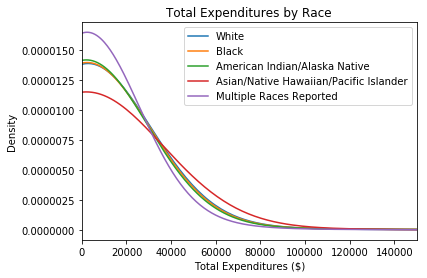

In [51]:
df.groupby('race').tot_exp.plot(kind='kde', bw_method=2, legend=True)

ax = plt.gca()

ax.set_xlim(0,150000)
# setting titles
ax.set_title('Total Expenditures by Race')
ax.set_xlabel('Total Expenditures ($)')

In [52]:
# Plot various expenditure categories w/r/t RH31
#axis_positions = [[0][0],[0][1],[0][2],[1][0],[1][1]]
#xlims = []

<Container object of 5 artists>

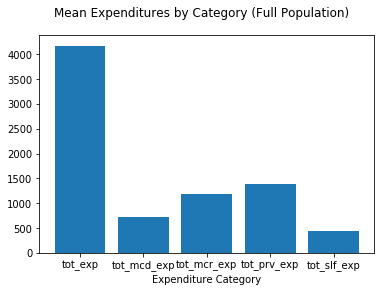

In [53]:
# Plot overall mean population level expenditures categories
plt.suptitle('Mean Expenditures by Category (Full Population)', fontsize=12), plt.xlabel('Expenditure Category')
plt.bar(exp_vars, df[exp_vars].mean())

(Text(0.5,1,u'Expenditure Distribution by Category (Full Population)'),
 Text(0.5,0,u'Expenditures ($)'))

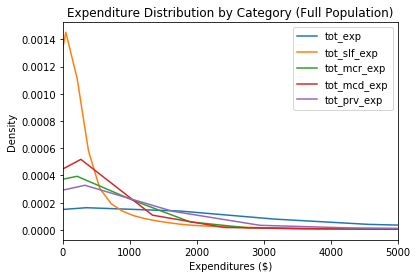

In [54]:
# Plot overall population level expenditures distribution
df[exp_vars].plot(kind='kde')

ax = plt.gca()
ax.set_xlim(0,5000)
ax.set_title('Expenditure Distribution by Category (Full Population)'), ax.set_xlabel('Expenditures ($)')

In [55]:
df.groupby('sex')[exp_vars].mean()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
sex,,,,,
male,3631.805854,384.491624,1012.786457,547.226298,1204.540998
female,4669.425600,510.171880,1353.085261,867.753503,1561.065982


In [56]:
df.groupby('sex')[exp_vars].mean().loc['male']

tot_exp        3631.805854
tot_slf_exp     384.491624
tot_mcr_exp    1012.786457
tot_mcd_exp     547.226298
tot_prv_exp    1204.540998
Name: male, dtype: float64

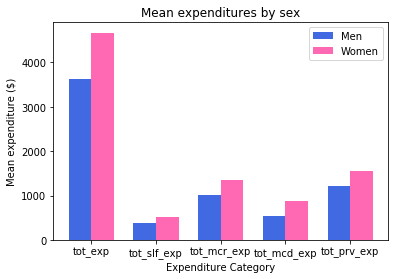

In [57]:
# Plot Bar graph - expenditures w/r/t sex
# Adapted code from https://matplotlib.org/examples/api/barchart_demo.html
N = 5

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df.groupby('sex')[exp_vars].mean().loc['male'], width, color='royalblue')

rects2 = ax.bar(ind+width, df.groupby('sex')[exp_vars].mean().loc['female'], width, color='hotpink')

# add some
ax.set_ylabel('Mean expenditure ($)'), ax.set_xlabel('Expenditure Category')
ax.set_title('Mean expenditures by sex')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('tot_exp', 'tot_slf_exp', 'tot_mcr_exp', 'tot_mcd_exp', 'tot_prv_exp') )

ax.legend((rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [58]:
exp_by_age = df.groupby('age_cat')[exp_vars].mean()
exp_by_age

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
age_cat,,,,,
0-4,1452.903046,61.510152,1.170558,799.691878,440.015736
5-17,1379.008696,200.612974,3.110973,643.767012,467.791718
18-24,1656.539379,197.270585,14.228520,538.128282,756.565931
25-44,2971.151306,355.235082,207.945424,658.119346,1420.984179
45-64,6163.025620,663.142022,1169.996256,869.536032,2685.586804
65-85,10687.618612,1034.718813,6720.107342,743.157777,1273.923455


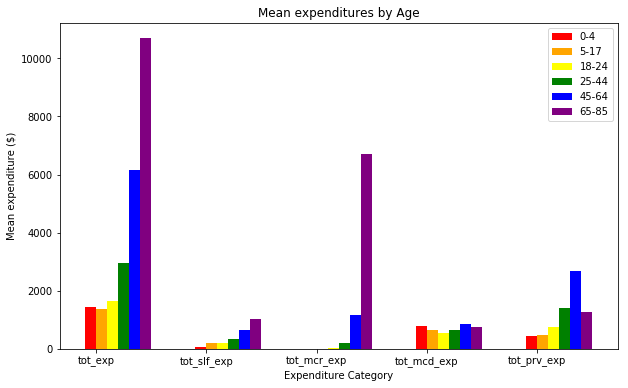

In [59]:
# Plot Bar graph - expenditures w/r/t age
# Adapted code from https://matplotlib.org/examples/api/barchart_demo.html
N = 5

ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, exp_by_age.iloc[0], width, color='red')

rects2 = ax.bar(ind+width, exp_by_age.iloc[1], width, color='orange')

rects3 = ax.bar(ind+width*2, exp_by_age.iloc[2], width, color='yellow')

rects4 = ax.bar(ind+width*3, exp_by_age.iloc[3], width, color='green')

rects5 = ax.bar(ind+width*4, exp_by_age.iloc[4], width, color='blue')

rects6 = ax.bar(ind+width*5, exp_by_age.iloc[5], width, color='purple')


# add some
ax.set_ylabel('Mean expenditure ($)'), ax.set_xlabel('Expenditure Category')
ax.set_title('Mean expenditures by Age')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('tot_exp', 'tot_slf_exp', 'tot_mcr_exp', 'tot_mcd_exp', 'tot_prv_exp') )

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]), ('0-4', '5-17', '18-24', '25-44', '45-64', '65-85') )

plt.show()

In [60]:
# Mean expenditures by region
exp_by_region = df.groupby('region')[exp_vars].mean()
exp_by_region

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
region,,,,,
Northeast,5781.573496,443.065689,1768.857959,1389.403275,1804.564547
Midwest,4754.822847,548.310476,1238.191051,749.066432,1845.506261
South,3697.453839,417.178796,1127.672984,519.435256,1140.939661
West,3360.985432,429.122205,799.960445,594.246029,1163.761254


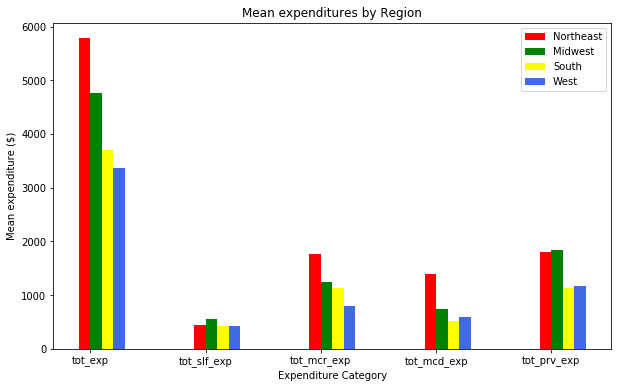

In [61]:
# Plot Bar graph - expenditures w/r/t age
# Adapted code from https://matplotlib.org/examples/api/barchart_demo.html
N = 5

ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, exp_by_region.iloc[0], width, color='red')

rects2 = ax.bar(ind+width, exp_by_region.iloc[1], width, color='green')

rects3 = ax.bar(ind+width*2, exp_by_region.iloc[2], width, color='yellow')

rects4 = ax.bar(ind+width*3, exp_by_region.iloc[3], width, color='royalblue')


# add some
ax.set_ylabel('Mean expenditure ($)'), ax.set_xlabel('Expenditure Category')
ax.set_title('Mean expenditures by Region')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('tot_exp', 'tot_slf_exp', 'tot_mcr_exp', 'tot_mcd_exp', 'tot_prv_exp') )

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Northeast','Midwest','South','West') )

plt.show()

rh31
Excellent    AxesSubplot(0.398529,0.125;0.227941x0.328261)
Very Good    AxesSubplot(0.398529,0.125;0.227941x0.328261)
Good         AxesSubplot(0.398529,0.125;0.227941x0.328261)
Fair         AxesSubplot(0.398529,0.125;0.227941x0.328261)
Poor         AxesSubplot(0.398529,0.125;0.227941x0.328261)
Name: tot_prv_exp, dtype: object

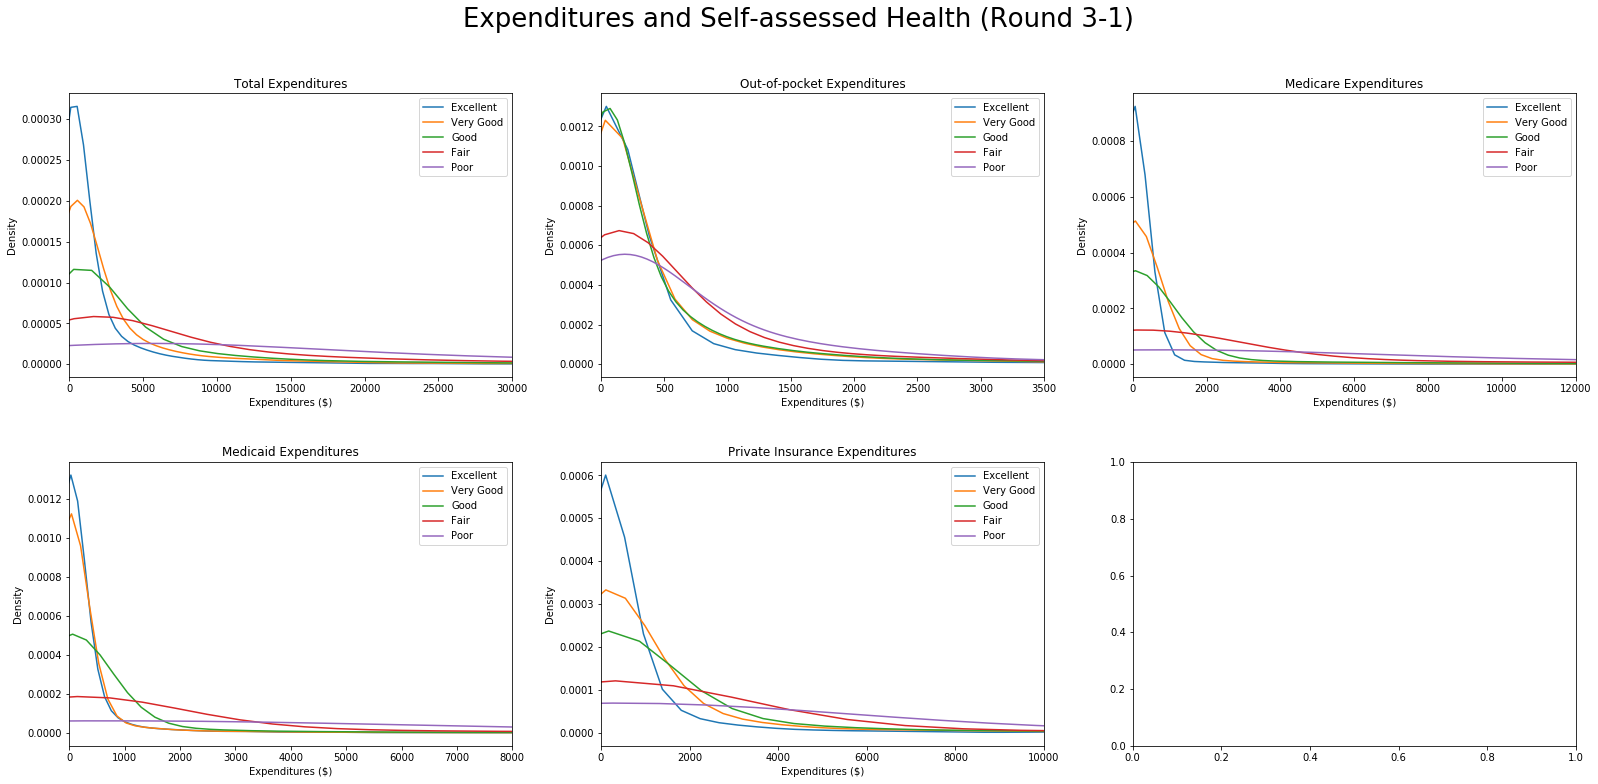

In [62]:
# Plot various expenditure categories w/r/t RH31
fig, axs = plt.subplots(2,3,figsize=(27,12))
plt.suptitle('Expenditures and Self-assessed Health (Round 3-1)', fontsize=26)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.30)
# Plot total expenditures
axs[0][0].set_xlim(0,30000)
axs[0][0].set_title ('Total Expenditures')
axs[0][0].set_xlabel('Expenditures ($)')
df.groupby('rh31')['tot_exp'].plot(kind='kde', ax=axs[0][0], legend=True)
# Plot Personal expenditures
axs[0][1].set_xlim(0,3500)
axs[0][1].set_title ('Out-of-pocket Expenditures')
axs[0][1].set_xlabel('Expenditures ($)')
df.groupby('rh31')['tot_slf_exp'].plot(kind='kde', ax=axs[0][1], legend=True)
# Plot Medicare expenditures
axs[0][2].set_xlim(0,12000)
axs[0][2].set_title ('Medicare Expenditures')
axs[0][2].set_xlabel('Expenditures ($)')
df.groupby('rh31')['tot_mcr_exp'].plot(kind='kde', ax=axs[0][2], legend=True)
# Plot Medicaid expenditures
axs[1][0].set_xlim(0,8000)
axs[1][0].set_title ('Medicaid Expenditures')
axs[1][0].set_xlabel('Expenditures ($)')
df.groupby('rh31')['tot_mcd_exp'].plot(kind='kde', ax=axs[1][0], legend=True)
# Plot Private insurance expenditures
axs[1][1].set_xlim(0,10000)
axs[1][1].set_title ('Private Insurance Expenditures')
axs[1][1].set_xlabel('Expenditures ($)')
df.groupby('rh31')['tot_prv_exp'].plot(kind='kde', ax=axs[1][1], legend=True)

mh31
Excellent    AxesSubplot(0.398529,0.125;0.227941x0.328261)
Very Good    AxesSubplot(0.398529,0.125;0.227941x0.328261)
Good         AxesSubplot(0.398529,0.125;0.227941x0.328261)
Fair         AxesSubplot(0.398529,0.125;0.227941x0.328261)
Poor         AxesSubplot(0.398529,0.125;0.227941x0.328261)
Name: tot_prv_exp, dtype: object

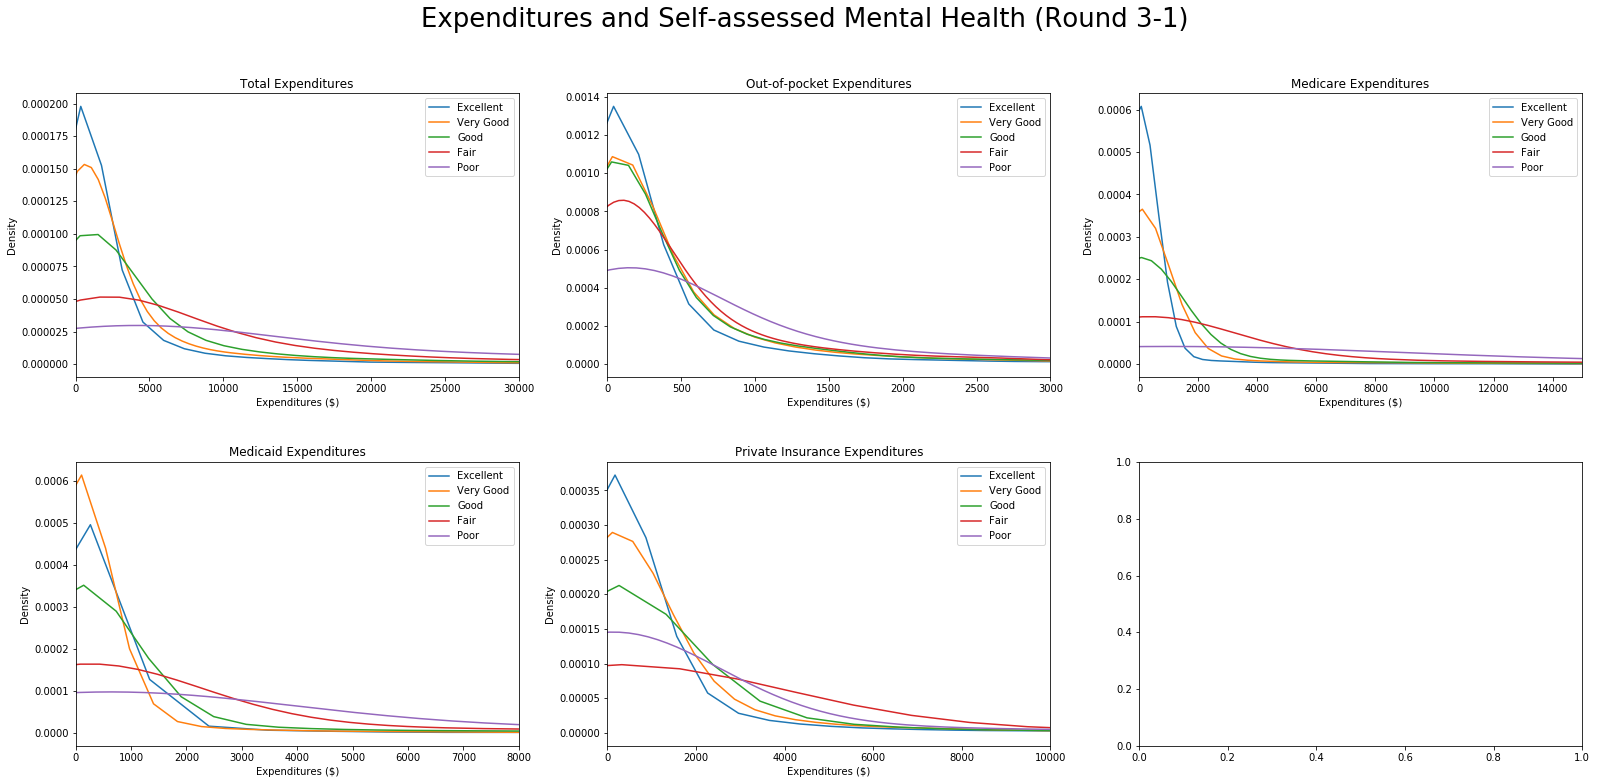

In [63]:
# Plot various expenditure categories w/r/t MH31
fig, axs = plt.subplots(2,3,figsize=(27,12))
plt.suptitle('Expenditures and Self-assessed Mental Health (Round 3-1)', fontsize=26)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)
# Plot total expenditures
axs[0][0].set_xlim(0,30000)
axs[0][0].set_title ('Total Expenditures')
axs[0][0].set_xlabel('Expenditures ($)')
df.groupby('mh31')['tot_exp'].plot(kind='kde', ax=axs[0][0], legend=True)
# Plot Personal expenditures
axs[0][1].set_xlim(0,3000)
axs[0][1].set_title ('Out-of-pocket Expenditures')
axs[0][1].set_xlabel('Expenditures ($)')
df.groupby('mh31')['tot_slf_exp'].plot(kind='kde', ax=axs[0][1], legend=True)
# Plot Medicare expenditures
axs[0][2].set_xlim(0,15000)
axs[0][2].set_title ('Medicare Expenditures')
axs[0][2].set_xlabel('Expenditures ($)')
df.groupby('mh31')['tot_mcr_exp'].plot(kind='kde', ax=axs[0][2], legend=True)
# Plot Medicaid expenditures
axs[1][0].set_xlim(0,8000)
axs[1][0].set_title ('Medicaid Expenditures')
axs[1][0].set_xlabel('Expenditures ($)')
df.groupby('mh31')['tot_mcd_exp'].plot(kind='kde', ax=axs[1][0], legend=True)
# Plot Private insurance expenditures
axs[1][1].set_xlim(0,10000)
axs[1][1].set_title ('Private Insurance Expenditures')
axs[1][1].set_xlabel('Expenditures ($)')
df.groupby('mh31')['tot_prv_exp'].plot(kind='kde', ax=axs[1][1], legend=True)

rh53
Excellent    AxesSubplot(0.125,0.125;0.775x0.755)
Very Good    AxesSubplot(0.125,0.125;0.775x0.755)
Good         AxesSubplot(0.125,0.125;0.775x0.755)
Fair         AxesSubplot(0.125,0.125;0.775x0.755)
Poor         AxesSubplot(0.125,0.125;0.775x0.755)
Name: tot_exp, dtype: object

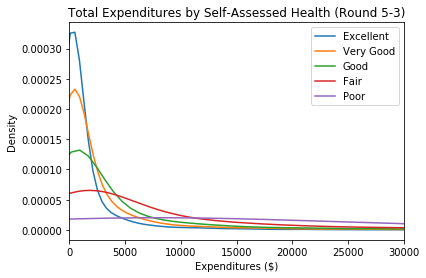

In [64]:
ax = plt.gca()
ax.set_xlim(0,30000)
ax.set_title ('Total Expenditures by Self-Assessed Health (Round 5-3)')
ax.set_xlabel('Expenditures ($)')
df.groupby('rh53')['tot_exp'].plot(kind='kde', legend=True)

mh53
Excellent    AxesSubplot(0.125,0.125;0.775x0.755)
Very Good    AxesSubplot(0.125,0.125;0.775x0.755)
Good         AxesSubplot(0.125,0.125;0.775x0.755)
Fair         AxesSubplot(0.125,0.125;0.775x0.755)
Poor         AxesSubplot(0.125,0.125;0.775x0.755)
Name: tot_exp, dtype: object

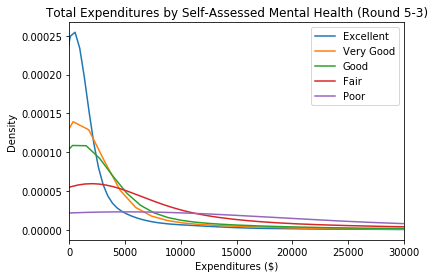

In [65]:
ax = plt.gca()
ax.set_xlim(0,30000)
ax.set_title ('Total Expenditures by Self-Assessed Mental Health (Round 5-3)')
ax.set_xlabel('Expenditures ($)')
df.groupby('mh53')['tot_exp'].plot(kind='kde', legend=True)

In [66]:
# Generate expenditures by diagnosis in exp_by_diag dictionary
# exp-by_diag = {exp_categ1: [mean_exp_categ1_spending_for_dx1, mean_exp_categ1_spending_for_dx2 ...],
#                exp_categ2: [mean_exp_categ2_spending_for_dx1, mean_exp_categ2_spending_for_dx2 ...], ...}
exp_by_diag = {}
for exp_categ in exp_vars:
    exp_by_diag['{0}'.format(exp_categ)] = []
    for condition in chron_dx_categs:
        exp_by_diag['{0}'.format(exp_categ)].append(d_chron_dfs['{0}_df'.format(condition)]['{0}'.format(exp_categ)].mean())

<Container object of 9 artists>

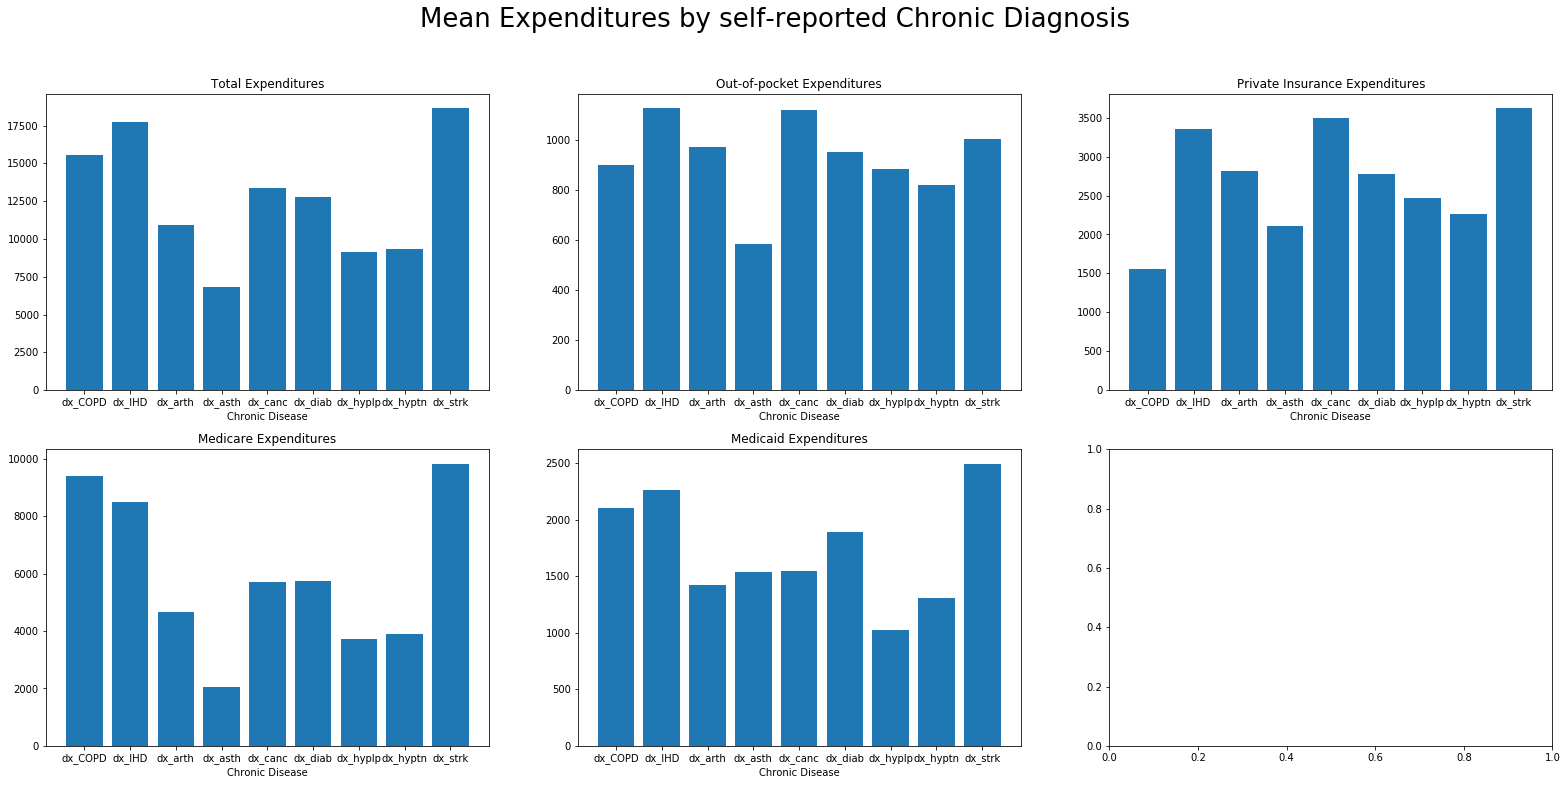

In [67]:
# Plot Bar charts of various mean expenditure categories
fig, axs = plt.subplots(2,3,figsize=(27,12))
plt.suptitle('Mean Expenditures by self-reported Chronic Diagnosis', fontsize=26)
# Plot total expenditures
plt.subplot(231)
plt.title('Total Expenditures'), plt.xlabel('Chronic Disease')
plt.bar(chron_dx_categs,exp_by_diag.get("tot_exp"))
# Plot Personal expenditures
plt.subplot(232)
plt.title('Out-of-pocket Expenditures'), plt.xlabel('Chronic Disease')
plt.bar(chron_dx_categs,exp_by_diag.get("tot_slf_exp"))
# Plot Private Insurance expenditures
plt.subplot(233)
plt.title('Private Insurance Expenditures'), plt.xlabel('Chronic Disease')
plt.bar(chron_dx_categs,exp_by_diag.get("tot_prv_exp"))
# Plot Medicare expenditures
plt.subplot(234)
plt.title('Medicare Expenditures'), plt.xlabel('Chronic Disease')
plt.bar(chron_dx_categs,exp_by_diag.get("tot_mcr_exp"))
# Plot Medicaid expenditures
plt.subplot(235)
plt.title('Medicaid Expenditures'), plt.xlabel('Chronic Disease')
plt.bar(chron_dx_categs,exp_by_diag.get("tot_mcd_exp"))

## Diving into Self-Reported-Health Categories

Understand the distribution of self-reported health answers

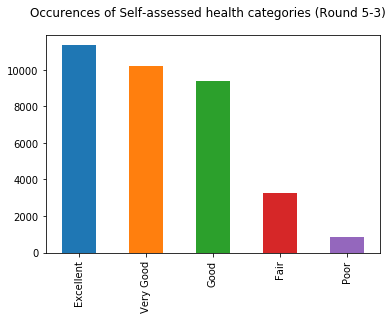

In [68]:
plt.suptitle('Occurences of Self-assessed health categories (Round 5-3)')
df.rh53.value_counts().sort_index().plot(kind='bar')

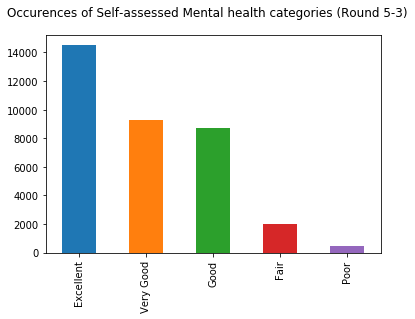

In [69]:
plt.suptitle('Occurences of Self-assessed Mental health categories (Round 5-3)')
df.mh53.value_counts().sort_index().plot(kind='bar')

{'boxes': [<matplotlib.lines.Line2D at 0x1a25397a10>],
 'caps': [<matplotlib.lines.Line2D at 0x1a254b5290>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a254b5ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a254b5b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a25397ad0>,
  <matplotlib.lines.Line2D at 0x1a25397e90>]}

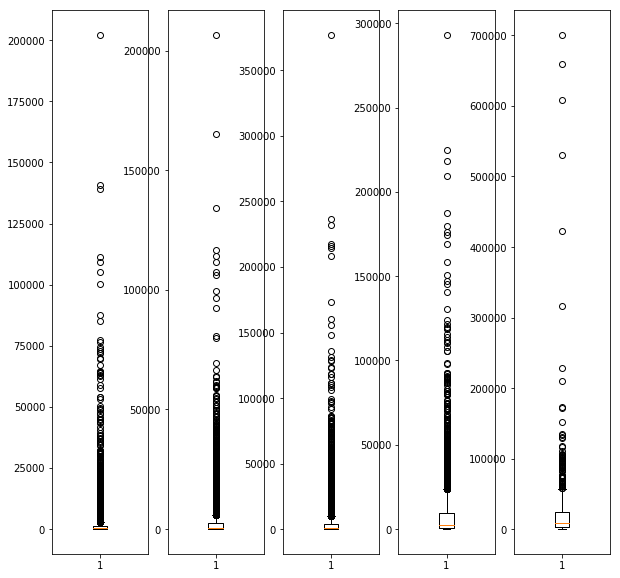

In [70]:
# Total expenditure by physical health rating, Round 5-3
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_ylim(0,20000)

#plt.subplots(1,5,sharey='row')

plt.subplot(151)
rh53_excel = df.rh53.isin({'Excellent'})
rh53_excel_exp = df[rh53_excel].tot_exp
plt.boxplot(rh53_excel_exp)

plt.subplot(152)
rh53_vg = df.rh53.isin({'Very Good'})
rh53_vg_exp = df[rh53_vg].tot_exp
plt.boxplot(rh53_vg_exp)

plt.subplot(153)
rh53_g = df.rh53.isin({'Good'})
rh53_g_exp = df[rh53_g].tot_exp
plt.boxplot(rh53_g_exp)

plt.subplot(154)
rh53_fair = df.rh53.isin({'Fair'})
rh53_fair_exp = df[rh53_fair].tot_exp
plt.boxplot(rh53_fair_exp)

plt.subplot(155)
rh53_poor = df.rh53.isin({'Poor'})
rh53_poor_exp = df[rh53_poor].tot_exp
plt.boxplot(rh53_poor_exp)

# .loc['Excellent'].plot(kind='boxplot')
#exp_avg_by_rh31.drop(['DK','Inapplicable','Not Ascertained','Refused'])
#exp_avg_by_rh53.sort_index()

{'boxes': [<matplotlib.lines.Line2D at 0x1a258b9090>],
 'caps': [<matplotlib.lines.Line2D at 0x1a258b9c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a258c57d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a258c5410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a258b94d0>,
  <matplotlib.lines.Line2D at 0x1a258b9890>]}

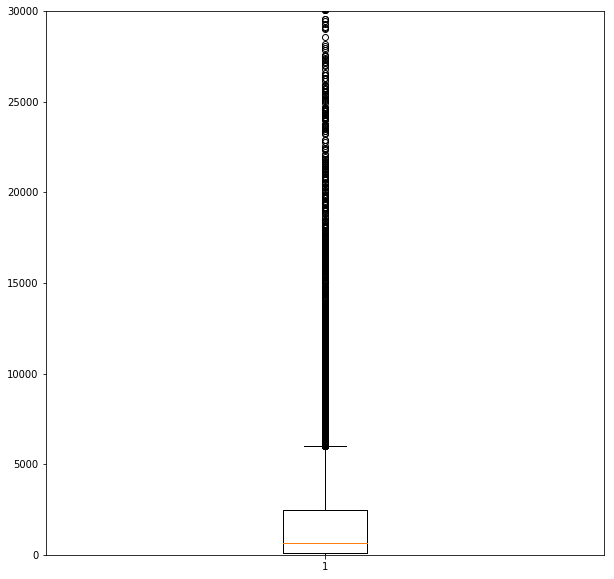

In [71]:
fig = plt.figure(figsize=(10,10))
rh53_vg = df.rh53.isin({'Very Good'})
rh53_vg_exp = df[rh53_vg].tot_exp
ax = plt.gca()
ax.set_ylim(0,30000)
plt.boxplot(rh53_vg_exp)

{'boxes': [<matplotlib.lines.Line2D at 0x1a25bac910>],
 'caps': [<matplotlib.lines.Line2D at 0x1a25bb6510>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a25bb6cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a25bb6c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a25bacd50>,
  <matplotlib.lines.Line2D at 0x1a25bacd90>]}

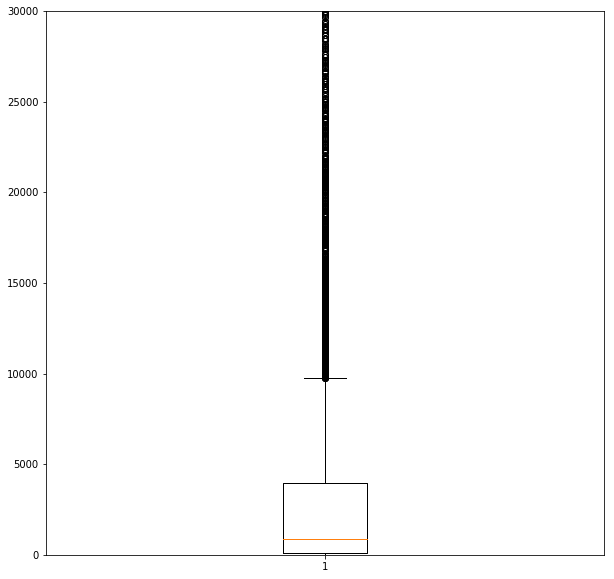

In [72]:
fig = plt.figure(figsize=(10,10))
rh53_g = df.rh53.isin({'Good'})
rh53_g_exp = df[rh53_g].tot_exp
ax = plt.gca()
ax.set_ylim(0,30000)
plt.boxplot(rh53_g_exp)

{'boxes': [<matplotlib.lines.Line2D at 0x1a25d8f150>],
 'caps': [<matplotlib.lines.Line2D at 0x1a25d8fd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a25d99890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a25d994d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a25d8f590>,
  <matplotlib.lines.Line2D at 0x1a25d8f950>]}

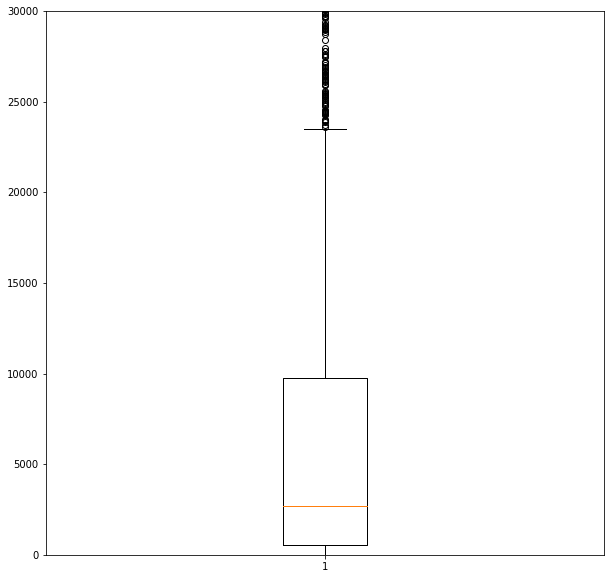

In [73]:
fig = plt.figure(figsize=(10,10))
rh53_fair = df.rh53.isin({'Fair'})
rh53_fair_exp = df[rh53_fair].tot_exp
ax = plt.gca()
ax.set_ylim(0,30000)
plt.boxplot(rh53_fair_exp)

{'boxes': [<matplotlib.lines.Line2D at 0x1a25f6b950>],
 'caps': [<matplotlib.lines.Line2D at 0x1a25f75550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a25f75d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a25f75cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a25f6bd90>,
  <matplotlib.lines.Line2D at 0x1a25f6bdd0>]}

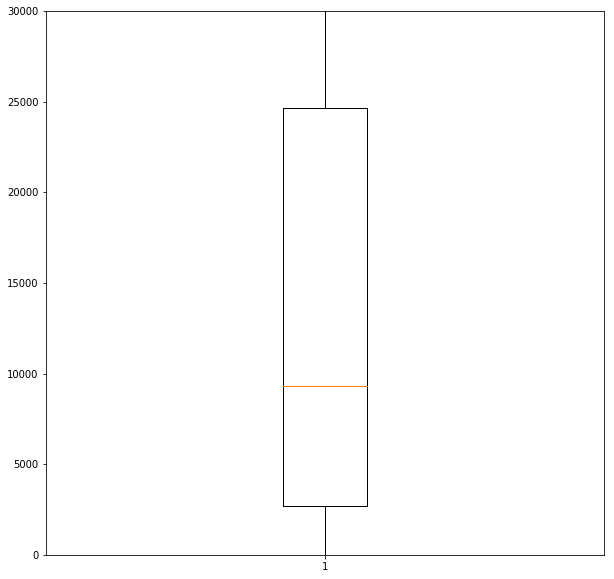

In [74]:
fig = plt.figure(figsize=(10,10))
rh53_poor = df.rh53.isin({'Poor'})
rh53_poor_exp = df[rh53_poor].tot_exp
ax = plt.gca()
ax.set_ylim(0,30000)
plt.boxplot(rh53_poor_exp)

In [75]:
df['exp_deciles'] = pd.qcut(df.tot_exp, 10, duplicates='drop')
df.exp_deciles.describe()
#df.["tot_exp"].plot(kind='kde')

count              35427
unique                 9
top       (-0.001, 12.0]
freq                7097
Name: exp_deciles, dtype: object

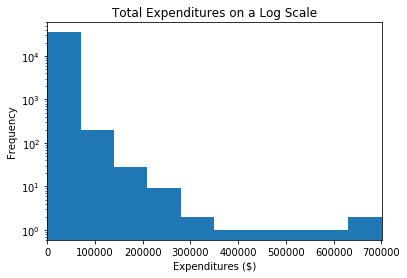

In [76]:
df.tot_exp.plot.hist()

ax = plt.gca()

ax.set_xlim(0, df.tot_exp.max())
# setting titles
ax.set_title('Total Expenditures on a Log Scale')
ax.set_xlabel('Expenditures ($)')
ax.set_yscale('log')

In [77]:
df.columns

Index([u'ER_exp', u'age', u'dx_COPD', u'dx_IHD', u'dx_arth', u'dx_asth',
       u'dx_canc', u'dx_diab', u'dx_hyplp', u'dx_hyptn', u'dx_strk',
       u'fam_inc_tot', u'inc_categ', u'inc_contin', u'inp_exp', u'insur_mcd',
       u'insur_mcr', u'insur_priv', u'mh31', u'mh31_42_chnge', u'mh42',
       u'mh42_53_chnge', u'mh53', u'mh_tot_chnge', u'outp_exp', u'race',
       u'region', u'rh31', u'rh31_42_chnge', u'rh42', u'rh42_53_chnge',
       u'rh53', u'rh_tot_chnge', u'sex', u'tot_exp', u'tot_mcd_exp',
       u'tot_mcr_exp', u'tot_prv_exp', u'tot_slf_exp', u'user_id',
       u'tot_exp_cats', u'tot_slf_cats', u'tot_mcr_cats', u'tot_mcd_cats',
       u'tot_prv_cats', u'age_cat', u'exp_deciles'],
      dtype='object')

In [78]:
df.describe()

,ER_exp,age,fam_inc_tot,inc_contin,inp_exp,mh31_42_chnge,mh42_53_chnge,mh_tot_chnge,outp_exp,rh31_42_chnge,rh42_53_chnge,rh_tot_chnge,tot_exp,tot_mcd_exp,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id
count,35427.000000,35427.000000,35427.000000,35427.000000,35427.000000,34151.000000,34548.000000,33976.000000,35427.000000,34167.000000,34562.000000,33998.000000,35427.000000,35427.000000,35427.000000,35427.000000,35427.000000,3.542700e+04
mean,164.249217,35.850905,61684.233014,308.495398,1039.900189,0.072970,0.003473,0.075995,275.737996,0.038868,-0.011921,0.025619,4171.132639,713.827702,1189.664606,1389.853078,449.816835,7.037777e+07
std,1163.160987,22.693505,58634.332666,297.844810,8917.259320,0.912194,0.899751,0.935724,2358.456694,0.914388,0.889924,0.933357,14037.579996,5296.987014,7279.611930,8109.777365,1554.355596,5.956064e+06
min,0.000000,0.000000,-134723.000000,-824.650000,0.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000110e+07
25%,0.000000,16.000000,21000.000000,110.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000,0.000000,0.000000,6.516310e+07
50%,0.000000,34.000000,45000.000000,222.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,620.000000,0.000000,0.000000,0.000000,41.000000,7.064110e+07
75%,0.000000,54.000000,84000.000000,409.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2850.000000,57.000000,0.000000,493.000000,346.500000,7.557910e+07
max,102011.000000,85.000000,521685.000000,3051.380000,656333.000000,4.000000,4.000000,4.000000,134736.000000,4.000000,4.000000,4.000000,700771.000000,534580.000000,421571.000000,653289.000000,84747.000000,8.057110e+07


In [79]:
# Save Data as Pickle File
with open('categorical_meps_2015.pkl', 'wb') as newdata:
    pickle.dump(df, newdata)

## Visualize Data at a Glance

In [80]:
df.sex.plot.pie(colors=['blue','pink'])

ValueError: fill value must be in categories

## Data Merging

TO-DO: combine 2015 and 2014 datasets, figure out how many people are in both
Visualize expenses in 2015 by 2014 reported health and other things

Index([u'age', u'dx_COPD', u'dx_IHD', u'dx_arth', u'dx_asth', u'dx_canc',
       u'dx_diab', u'dx_hyplp', u'dx_hyptn', u'dx_strk', u'fam_inc_tot',
       u'inc_categ', u'inc_contin', u'insur_mcd', u'insur_mcr', u'insur_priv',
       u'mh31', u'mh31_42_chnge', u'mh42', u'mh42_53_chnge', u'mh53',
       u'mh_tot_chnge', u'race', u'region', u'rh31', u'rh31_42_chnge', u'rh42',
       u'rh42_53_chnge', u'rh53', u'rh_tot_chnge', u'sex', u'tot_exp',
       u'tot_mcd_exp', u'tot_mcr_exp', u'tot_prv_exp', u'tot_slf_exp',
       u'user_id', u'age_cat', u'tot_exp_cats', u'tot_slf_cats',
       u'tot_mcr_cats', u'tot_mcd_cats', u'tot_prv_cats'],
      dtype='object')